In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import seaborn as sns

data = pd.read_csv(r'C:\Users\asiya\Downloads\Telco_customer_churn.xlsx - Telco_Churn.csv')

In [31]:
columns = data.columns.values.tolist()
print(columns)

['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


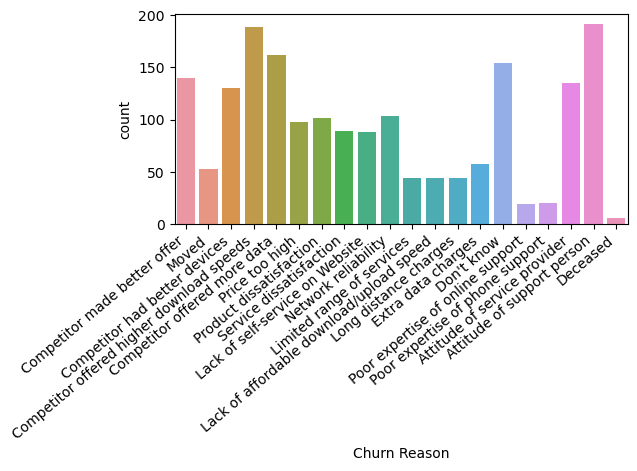

In [32]:
ax = sns.countplot(x="Churn Reason",data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

This visualization of the data showed that the highest reason for churning was atittude of support person

In [33]:
#cleaning data
dataset = data.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude'], axis=1)

In [34]:
cleandata = dataset.drop(['Churn Reason',], axis=1)

In [35]:
cleandata = dataset.drop(['Churn Label',], axis=1)

In [36]:
def featurize(cleandata):
    X = cleandata[['Churn Value','Churn Score','Monthly Charges', 'Total Charges', 'Tenure Months', 'CLTV']]
    X['Gender'] = [1 if x=='Male' else 0 for x in cleandata['Gender']] 
    X['Senior Citizen'] = [1 if x=='Yes' else 0 for x in cleandata['Senior Citizen']] 
    X['Partner'] = [1 if x=='Yes' else 0 for x in cleandata['Partner']] 
    X['Dependents'] = [1 if x=='Yes' else 0 for x in cleandata['Dependents']] 
    X['Phone Service'] = [1 if x=='Yes' else 0 for x in cleandata['Phone Service']] 
    X['Multiple Lines'] = [1 if x=='Yes' else 0 for x in cleandata['Multiple Lines']] 
    X['Online Security'] = [1 if x=='Yes' else 0 for x in cleandata['Online Security']] 
    X['Online Backup'] = [1 if x=='Yes' else 0 for x in cleandata['Online Backup']] 
    X['Device Protection'] = [1 if x=='Yes' else 0 for x in cleandata['Device Protection']] 
    X['Tech Support'] = [1 if x=='Yes' else 0 for x in cleandata['Tech Support']] 
    X['Streaming TV'] = [1 if x=='Yes' else 0 for x in cleandata['Streaming TV']] 
    X['Streaming Movies'] = [1 if x=='Yes' else 0 for x in cleandata['Streaming Movies']] 
    X['Internet Service'] = [1 if x=='Fiber Optic' else 0 for x in cleandata['Internet Service']] 
    X['Contract'] = [1 if x=='Month-to-month' else 0 for x in cleandata['Contract']] 
    X['Paperless Billing'] = [1 if x=='Yes' else 0 for x in cleandata['Paperless Billing']] 

    return X

#convert Y into 0/1 format
churns = [1 if 'Churn Value' == '1' else 0 for y in cleandata['Churn Value']]

X_test = featurize(cleandata)
X_test.head()

C:\Users\asiya\AppData\Local\Temp\ipykernel_45424\2858024105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = [1 if x=='Male' else 0 for x in cleandata['Gender']]
C:\Users\asiya\AppData\Local\Temp\ipykernel_45424\2858024105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Senior Citizen'] = [1 if x=='Yes' else 0 for x in cleandata['Senior Citizen']]
C:\Users\asiya\AppData\Local\Temp\ipykernel_45424\2858024105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Churn Value,Churn Score,Monthly Charges,Total Charges,Tenure Months,CLTV,Gender,Senior Citizen,Partner,Dependents,...,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Internet Service,Contract,Paperless Billing
0,1,86,53.85,108.15,2,3239,1,0,0,0,...,0,1,1,0,0,0,0,0,1,1
1,1,67,70.70,151.65,2,2701,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,1,86,99.65,820.5,8,5372,0,0,0,1,...,1,0,0,1,0,1,1,0,1,1
3,1,84,104.80,3046.05,28,5003,0,0,1,1,...,1,0,0,1,1,1,1,0,1,1
4,1,89,103.70,5036.3,49,5340,1,0,0,1,...,1,0,1,1,0,1,1,0,1,1


In the step above we transformed data by converting strings to ints, next we will load it to a csv

In [38]:
X_test.to_csv("clean.csv")

In [39]:
clean = pd.read_csv(r"C:\Users\asiya\clean.csv")

In [40]:

# Define number of clusters
k = 3

# Extract features to be used for clustering
features = ['Churn Value', 'Churn Score']

# Create an instance of the KMeans class
kmeans = KMeans(n_clusters=k)

# Fit the KMeans model on the data
kmeans.fit(clean[features])

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the dataframe
clean['cluster'] = labels

# Print the first few rows of the clustered dataframe
print(clean.head())


   Unnamed: 0  Churn Value  Churn Score  Monthly Charges Total Charges  \
0           0            1           86            53.85        108.15   
1           1            1           67            70.70        151.65   
2           2            1           86            99.65         820.5   
3           3            1           84           104.80       3046.05   
4           4            1           89           103.70        5036.3   

   Tenure Months  CLTV  Gender  Senior Citizen  Partner  ...  Online Security  \
0              2  3239       1               0        0  ...                1   
1              2  2701       0               0        0  ...                0   
2              8  5372       0               0        0  ...                0   
3             28  5003       0               0        1  ...                0   
4             49  5340       1               0        0  ...                0   

   Online Backup  Device Protection  Tech Support  Streaming TV  \
0

In [49]:
cluster1 = (clean.loc[clean['cluster'] == 0])
cluster2 = (clean.loc[clean['cluster'] == 2])
cluster3 = (clean.loc[clean['cluster'] == 1])

In [50]:
cluster1.mean()

C:\Users\asiya\AppData\Local\Temp\ipykernel_45424\3458262551.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster1.mean()


Unnamed: 0           4435.308998
Churn Value             0.000000
Churn Score            33.410017
Monthly Charges        60.835378
Tenure Months          37.241511
CLTV                 4469.315365
Gender                  0.500000
Senior Citizen          0.127334
Partner                 0.536078
Dependents              0.297114
Phone Service           0.891766
Multiple Lines          0.403226
Online Security         0.337012
Online Backup           0.356961
Device Protection       0.371817
Tech Support            0.332767
Streaming TV            0.369270
Streaming Movies        0.366299
Internet Service        0.000000
Contract                0.434635
Paperless Billing       0.540323
cluster                 0.000000
dtype: float64

In [51]:
cluster2.mean()

C:\Users\asiya\AppData\Local\Temp\ipykernel_45424\3660930804.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster2.mean()


Unnamed: 0           3904.990599
Churn Value             0.159812
Churn Score            61.443008
Monthly Charges        63.835566
Tenure Months          34.730513
CLTV                 4450.933803
Gender                  0.513122
Senior Citizen          0.152370
Partner                 0.496671
Dependents              0.260086
Phone Service           0.907951
Multiple Lines          0.417156
Online Security         0.298081
Online Backup           0.361927
Device Protection       0.345476
Tech Support            0.309048
Streaming TV            0.378378
Streaming Movies        0.384254
Internet Service        0.000000
Contract                0.495887
Paperless Billing       0.567959
cluster                 2.000000
dtype: float64

In [48]:
cluster3.mean()

C:\Users\asiya\AppData\Local\Temp\ipykernel_45424\1692017132.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster3.mean()


Unnamed: 0           2052.190253
Churn Value             0.684630
Churn Score            83.337395
Monthly Charges        70.204428
Tenure Months          24.171509
CLTV                 4263.515464
Gender                  0.500000
Senior Citizen          0.212277
Partner                 0.408154
Dependents              0.123243
Phone Service           0.910028
Multiple Lines          0.447985
Online Security         0.217432
Online Backup           0.311153
Device Protection       0.311153
Tech Support            0.220712
Streaming TV            0.408154
Streaming Movies        0.416120
Internet Service        0.000000
Contract                0.742737
Paperless Billing       0.678538
cluster                 1.000000
dtype: float64